#  Dimensionality Reduction


In this notebook, I will be applying some of the dimensionality reduction algorithms. The aim of this task is to showcase my ability to apply machine learning algorithms to well-specified tasks and to evaluate the performance of these algorithms and to use this evaluation to improve performance.

In the following tasks, we will be working with wine quality dataset.

The full dataset contains approximately 1600 data points, each of which contains on 
a particular type of red wine.

For each wine, it lists eleven physiochemical properties (e.g. fixed acidity, free sulphur dioxide) and a subjective judgement of the wine’s quality. The reduced dataset contains the same number of datapoints, but omits three features (namely citric acid, residual sugar and density).

The objective of this notebook:-

Use scikit learn’s implementation of sparse PCA to fit a model with three components to the raw data. Sparse PCA is a version of PCA which attempts to find sparse components. The idea is similar to that discussed for factor analysis. Sparsity is controlled by a parameter alpha. For this task, alpha will be set to 5. Print out the components found by sparse PCA.

2nd scale the data so that it has mean 0 and variance 1 (useing scikit learn’s Standard Scaler).

3rd Use sparse PCA to fit a model with three components to the scaled data and print out the resulting components.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data=pd.read_csv("winequality-red-reduced.csv")
print("|| Data:"+str(data.shape)+"||")
data.head()


|| Data:(1599, 9)||


,fixed acidity,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.88,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.76,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.28,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.087467,15.874922,46.467792,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.047065,10.460157,32.895324,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.012000,1.000000,6.000000,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.070000,7.000000,22.000000,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.079000,14.000000,38.000000,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.090000,21.000000,62.000000,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.611000,72.000000,289.000000,4.010000,2.000000,14.900000,8.000000


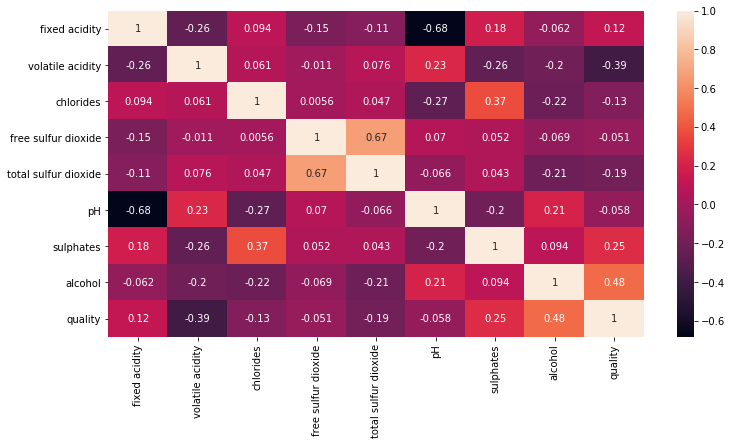

In [4]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Evaluating correlation between latent variables

1) Content - fixed acidity,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates.
Above figure exhibits postive correlation between sulphates and fixed acidity, and there is postive correlation between chlorides and total sulfur dioxide, free sulfur dioxide and volatile acidity.

2)properties - (pH and alcohol) These two features displays postive correlation

3)Quality - It has postive correlation.

In [5]:
sparse_pca = SparsePCA(n_components=3,alpha=5) # higher alpha values lead to more sparse results.
sparse_pca.fit(data)


SparsePCA(U_init=None, V_init=None, alpha=5, max_iter=1000, method='lars',
          n_components=3, n_jobs=None, normalize_components='deprecated',
          random_state=None, ridge_alpha=0.01, tol=1e-08, verbose=False)

In [6]:
sparse_pca_components = sparse_pca.components_
sparse_pca_components

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  9.99995592e-01,  0.00000000e+00,
         0.00000000e+00, -2.87406144e-03, -7.46111426e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Above numpy array exbitis sparse matrix, a matrix containing a large number of zero elements.
The output explains, how sparsity works in data, by applying Sparse PCA, the data is distributed sparsely over the available space.


In [7]:
sparse_pca_components.shape 
# The output of this sell shows,Sparse PCA has reduced the dimensionality of a dataset by 
# introducing sparsity structures in the features.

(3, 9)

In [8]:
transformed = sparse_pca.transform(data)
transformed


array([[-12.34091361,   4.82665527,   0.91053195],
       [ 20.33107144,  -9.03473087,   0.51449235],
       [  7.45984105,   0.86625923,   0.51449235],
       ...,
       [ -6.40563743, -12.9951269 ,   1.99964086],
       [ -2.44224364, -15.96542393,   2.39568047],
       [ -4.42544814,  -2.1040378 ,   2.29667057]])

In [9]:
#Converting numpy array into pandas dataframe
pdata_frame=pd.DataFrame(data= transformed, columns=['PC1','PC2','PC3'])
pdata_frame


,PC1,PC2,PC3
0,-12.340914,4.826655,0.910532
1,20.331071,-9.034731,0.514492
2,7.459841,0.866259,0.514492
3,13.399670,-1.113939,-2.851844
4,-12.340914,4.826655,0.910532
...,...,...,...
1594,-2.443097,-15.965424,2.098651
1595,4.484835,-22.896117,2.395680
1596,-6.405637,-12.995127,1.999641
1597,-2.442244,-15.965424,2.395680


Output displays sucessfully conversion between numpy array into pandas dataframe for the purpose of dimensionality reduction visualization and data also suggest,Sparse PCA has successfully reduced dimensionality of data with 9 features into 3 components.

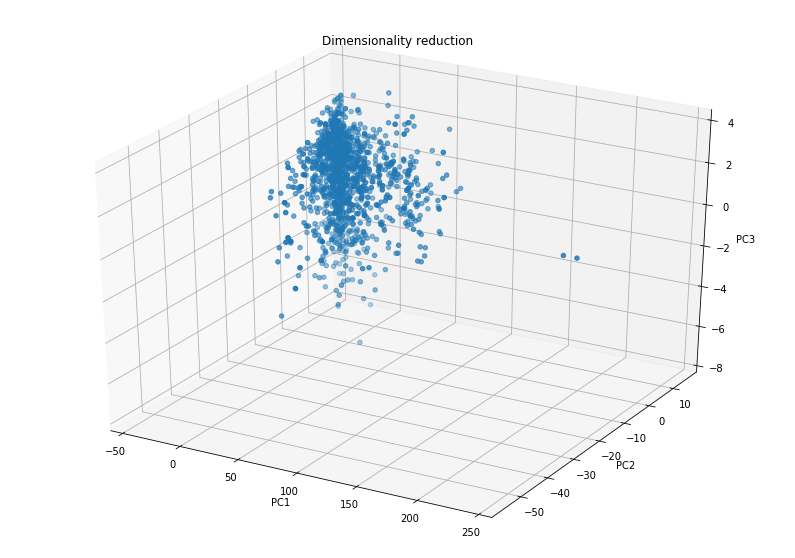

In [10]:
fig=plt.figure(figsize=(14,10))
ax=plt.axes(projection='3d')
ax.scatter3D(pdata_frame['PC1'], pdata_frame['PC2'], pdata_frame['PC3'])
plt.title("Dimensionality reduction")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [11]:
# Applying Standard Scaler function for data standardization.

scaler=StandardScaler()
std_data=scaler.fit_transform(data)
std_data

array([[-0.52835961,  0.96187667, -0.24370669, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245,  0.2238752 , ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527,  0.09635286, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.24370669, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.26496041, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919, -0.43499018, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [12]:
sparse_pca = SparsePCA(n_components=3,alpha=5, random_state=0)
sparse_pca.fit(std_data)

SparsePCA(U_init=None, V_init=None, alpha=5, max_iter=1000, method='lars',
          n_components=3, n_jobs=None, normalize_components='deprecated',
          random_state=0, ridge_alpha=0.01, tol=1e-08, verbose=False)

In [13]:
print(sparse_pca.components_)

[[-0.6099484   0.13974952 -0.28749865  0.          0.          0.66393343
  -0.25644816  0.13857955  0.        ]
 [ 0.          0.45608769  0.07217093  0.          0.          0.
  -0.19758447 -0.56528422 -0.6543619 ]
 [ 0.          0.          0.          0.70710678  0.70710678  0.
   0.          0.          0.        ]]


After data standardization there is less noise or less of null values, that represents the sparcity in your data.

In [14]:
std = sparse_pca.transform(std_data)
std

array([[ 1.36033096,  1.55746875, -0.59181702],
       [-0.22353503,  1.72031331,  1.04805929],
       [ 0.02477453,  1.43934433,  0.10177942],
       ...,
       [ 1.16865162, -0.7813784 ,  0.7410496 ],
       [ 1.98941742,  0.8141983 ,  1.02706251],
       [ 1.18596297, -1.1959471 ,  0.04716046]])

In [15]:
pdata_frame=pd.DataFrame(data= std, columns=['PC1','PC2','PC3'])
pdata_frame


,PC1,PC2,PC3
0,1.360331,1.557469,-0.591817
1,-0.223535,1.720313,1.048059
2,0.024775,1.439344,0.101779
3,-1.714809,-0.492679,0.363420
4,1.360331,1.557469,-0.591817
...,...,...,...
1594,1.483493,0.723604,1.027063
1595,1.860472,-0.828845,1.644750
1596,1.168652,-0.781378,0.741050
1597,1.989417,0.814198,1.027063


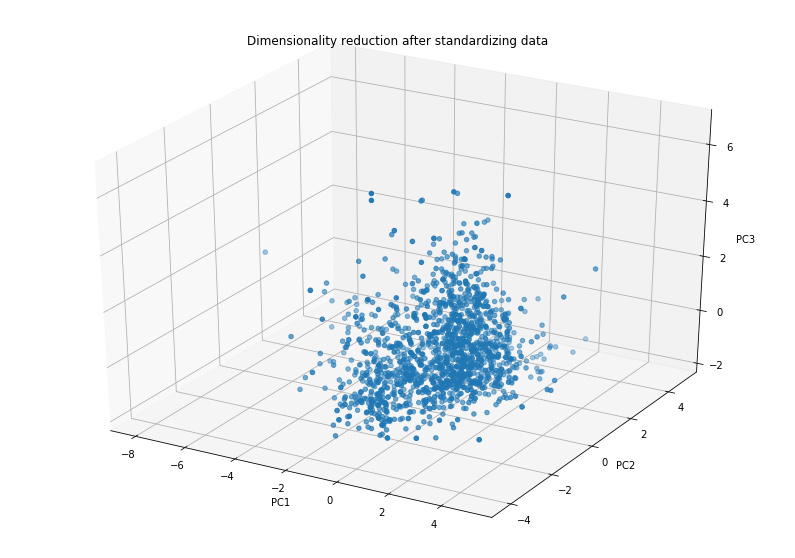

In [16]:
fig=plt.figure(figsize=(14,10))
ax=plt.axes(projection='3d')
ax.scatter3D(std[:,0], std[:,1], std[:,2])
plt.title("Dimensionality reduction after standardizing data")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

# Observations

The resulting visulazations of both figures of dimensionality reduction shows clear difference between feature reduction on standardized and unscaled data. 
Before scaling data visulazation has shown how Sparse PCA apply the sparsity on data, while extracting the principal components and how data is distributed sparsely over the available space, that is by using sparse matrix,which is a matrix containing a large number of zero elements or the number of non-zero elements is quite low and also with unscaled, there is greater order of magnitude.
After scaling data, it gave components same variance of 1 and mean 0 and from above figure exbitis after scaling data, the magnitude of all the components have less noise across while reducing dimensions by using sparsity.
Out of these two results, scaled data has shown it will capture more imforamtion on shared relationship between variables.
The 2nd result support my colleague's suggestion of using three latent variables-(content,properties and quality) as these 3 latent variables have helped to reduce the dimensionality of data and also by capturing most of the data or represting the underlying notion of data, these latent varaibles has shown the reprenstion of shared variance and also because content and properties can be seen as explanatory varaibles of quality as dependent variable.